# Dimensionality reducation with Eigenfaces.
[Source](https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html)

## Load the dataset

🤖: Dataset contains 1140 points in 1850-dimensional space


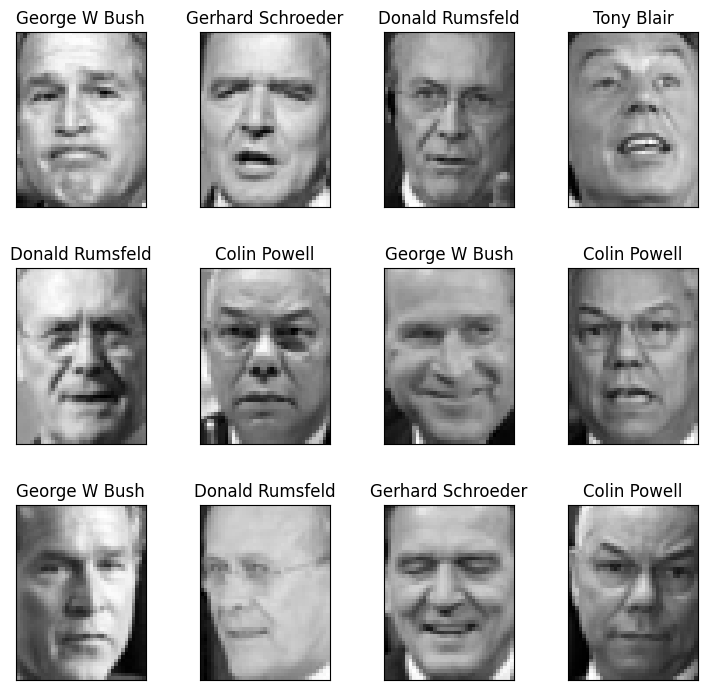

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_lfw_people #lol
from sklearn.preprocessing import StandardScaler

dataset     = fetch_lfw_people(min_faces_per_person=100, resize=0.4)
A           = dataset['data']
labels      = dataset['target']
classes     = dataset['target_names']
label_names = np.array([classes[label] for label in labels])
print('🤖: Dataset contains {} points in {}-dimensional space'.format(*A.shape))

def plot_gallery(dataset, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    n_samples, h, w = dataset.images.shape
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    images, titles = dataset["images"], dataset["target"]
    titles = [dataset["target_names"][title] for title in titles]
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

plot_gallery(dataset)

## Task: normalize the data to have zero mean

In [ ]:
### YOU CODE HERE
A_std = A - A.mean(axis = 0)

## Task: Calculate SVD of normalized matrix

$$
A_{std} = U \Sigma V^\top
$$

In [ ]:
### YOU CODE HERE
u, sigmas, vt = ...

## Task: plot eigenfaces

In [ ]:
def plot_eigenfaces(dataset=dataset, u=u, sigmas=sigmas, vt=vt, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    n_samples, h, w = dataset.images.shape
    ### YOU CODE HERE
    projections = ...
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)

        plt.imshow(projections[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(f"Eigenface #{i+1}", size=12)
        plt.xticks(())
        plt.yticks(())

plot_eigenfaces()

## Task: plot reconstructions

Rank 20 compression


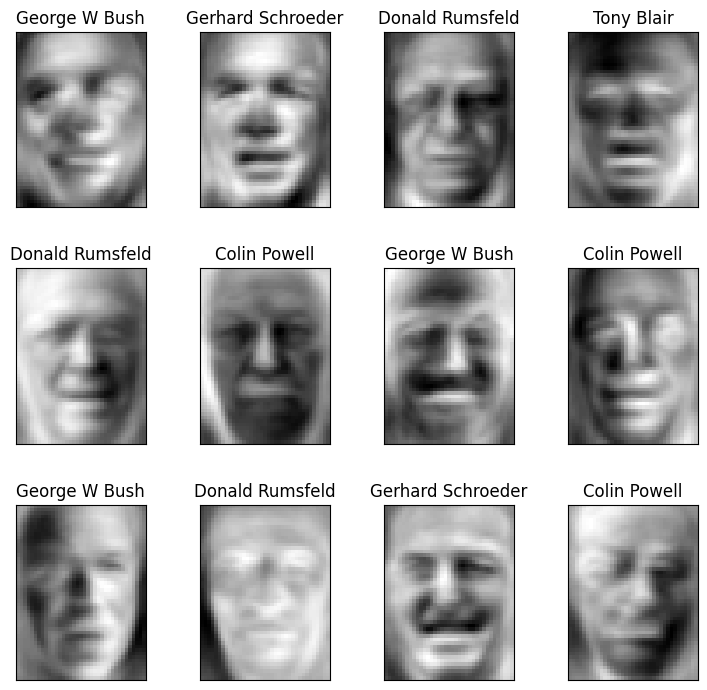

In [ ]:
def plot_projections(rank = 20, dataset=dataset, u=u, sigmas=sigmas, vt=vt, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    n_samples, h, w = dataset.images.shape
    ### YOU CODE HERE
    projections = ...
    reconstructions = ...

    images, titles = dataset["images"], dataset["target"]
    titles = [dataset["target_names"][title] for title in titles]
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    print(f"Rank {rank} compression")
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        ### YOU CODE HERE
        plt.imshow(reconstructions[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(f"{titles[i]}", size=12)
        plt.xticks(())
        plt.yticks(())

plot_projections()

## Plot cumulative variance by each individual component graph

In [ ]:
### YOUR CODE HERE
total_variance = ...
variance_explained = [(i / total_variance)*100 for i in sorted(sigmas, reverse=True)]
cumulative_variance_explained = np.cumsum(variance_explained)

### YOUR CODE HERE
n_sigmas = ...
xs = [0.5 + i for i in range(n_sigmas)]
plt.bar(xs, variance_explained, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(xs, cumulative_variance_explained, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal components')
plt.legend(loc='best')
# plt.xticks(np.arange(A_std.shape[1]+1))
plt.show()